In [1]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
sns.set_style('dark')

In [2]:
correct_items = pd.read_csv("/kaggle/input/hci-studz/results_correct_items.csv")
sus = pd.read_csv("/kaggle/input/hci-studz/results_sus.csv")
rtime = pd.read_csv("/kaggle/input/hci-studz/results_time.csv")

# Correct Items

The number of items the user has correctly placed.

## Statistical Overview

In [3]:
correct_items.describe()

,ParticipantID,Measurement
count,24.000000,24.000000
mean,6.500000,11.708333
std,3.526299,0.550033
min,1.000000,10.000000
25%,3.750000,11.750000
50%,6.500000,12.000000
75%,9.250000,12.000000
max,12.000000,12.000000


## Full Table:

In [4]:
correct_items

,ParticipantID,Interface,Measurement
0,1,A,11
1,1,B,10
2,2,A,12
3,2,B,11
4,3,A,12
5,3,B,12
6,4,B,11
7,4,A,12
8,5,A,11
9,5,B,11


In [5]:
correct_items.columns

Index(['ParticipantID', 'Interface', 'Measurement'], dtype='object')

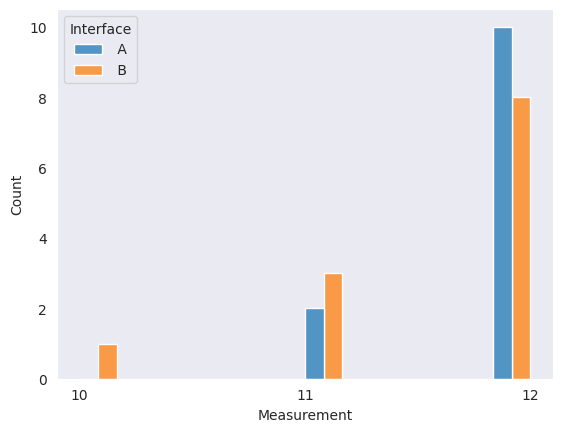

In [6]:
ax = sns.histplot(data=correct_items, x='Measurement', hue='Interface', multiple='dodge')
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()

In [7]:
# Pivoting the table to get measurements for each interface per participant
correct_items_pivot = correct_items.pivot(index='ParticipantID', columns='Interface', values='Measurement')
# Performing the Shapiro-Wilk test for normality on columns 'A' and 'B'
shapiro_test_A = stats.shapiro(correct_items_pivot[' A'])
shapiro_test_B = stats.shapiro(correct_items_pivot[' B'])

# Printing the results
print('Shapiro-Wilk Test for Column A:', shapiro_test_A)
print('Shapiro-Wilk Test for Column B:', shapiro_test_B)

Shapiro-Wilk Test for Column A: ShapiroResult(statistic=0.4646521210670471, pvalue=9.811225936573464e-06)
Shapiro-Wilk Test for Column B: ShapiroResult(statistic=0.6743340492248535, pvalue=0.0004822534101549536)


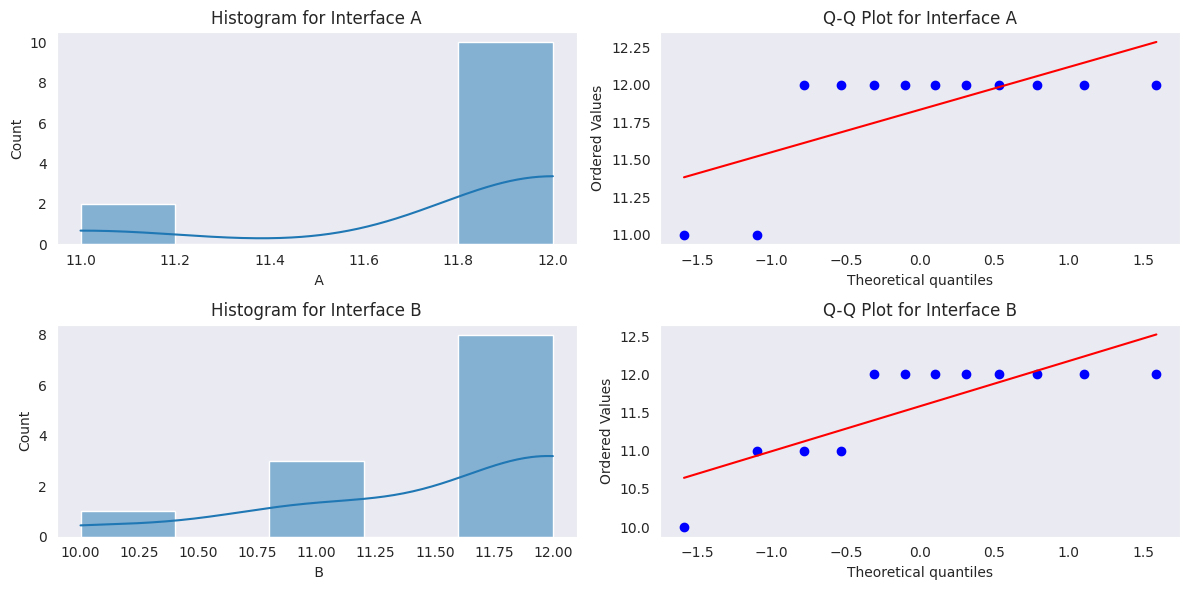

In [8]:
# Histogram for Column A
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(correct_items_pivot[' A'], kde=True)
plt.title('Histogram for Interface A')

# Q-Q plot for Column A
plt.subplot(2, 2, 2)
stats.probplot(correct_items_pivot[' A'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Interface A')

# Histogram for Column B
plt.subplot(2, 2, 3)
sns.histplot(correct_items_pivot[' B'], kde=True)
plt.title('Histogram for Interface B')

# Q-Q plot for Column B
plt.subplot(2, 2, 4)
stats.probplot(correct_items_pivot[' B'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Interface B')

plt.tight_layout()
plt.show()

In [9]:

stat, p = stats.wilcoxon(correct_items_pivot[' A'], correct_items_pivot[' B'], zero_method ='pratt')

# Outputting the results
print('Wilcoxon Test Statistic:', stat)
print('P-value:', p)

Wilcoxon Test Statistic: 0.0
P-value: 0.0832645166635504


/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


# SUS


In [10]:
sus['Interface'] = sus['Interface'].str.replace("'", "")

In [11]:
sus

,ParticipantID,Interface,Measurement
0,1,A,55.0
1,1,B,85.0
2,2,A,90.0
3,2,B,85.0
4,3,A,67.5
5,3,B,55.0
6,4,A,70.0
7,4,B,72.5
8,5,A,87.5
9,5,B,80.0


In [12]:
sus = sus.pivot(index='ParticipantID', columns='Interface', values='Measurement')

Shapiro-Wilk Test for Column A : ShapiroResult(statistic=0.9608685970306396, pvalue=0.7957308888435364)
Shapiro-Wilk Test for Column B: ShapiroResult(statistic=0.8833404779434204, pvalue=0.14250773191452026)


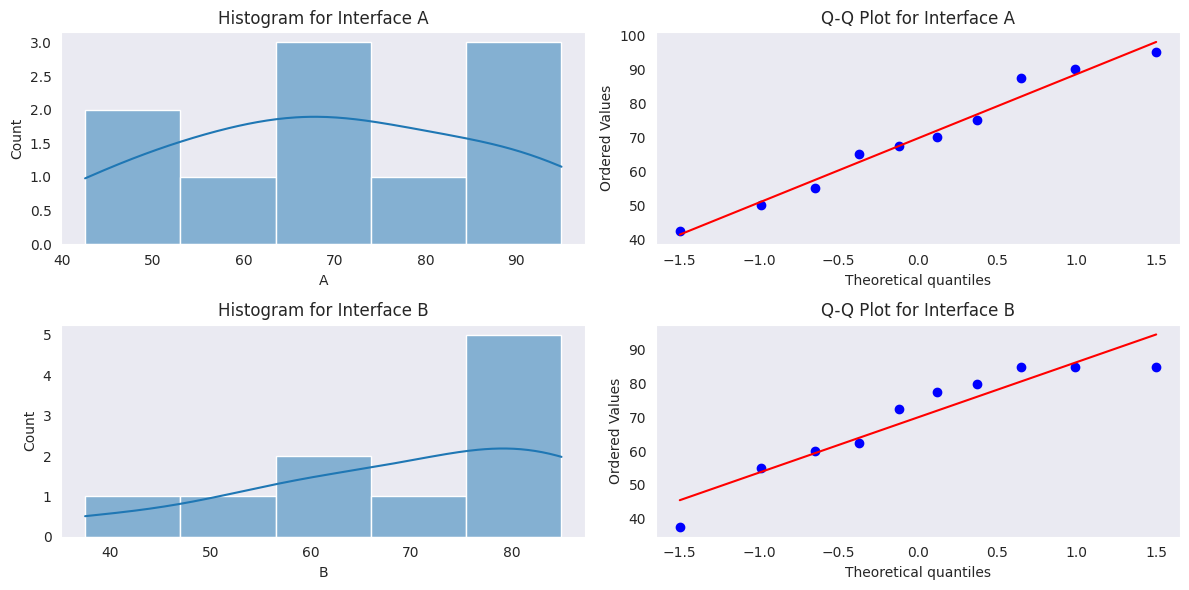

In [13]:
# Performing the Shapiro-Wilk test for normality on columns 'A' and 'B'
shapiro_test_A = stats.shapiro(sus['A'])
shapiro_test_B = stats.shapiro(sus['B'])

# Printing the results
print('Shapiro-Wilk Test for Column A :', shapiro_test_A)
print('Shapiro-Wilk Test for Column B:', shapiro_test_B)

# Histogram for Column A
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(sus['A'], kde=True)
plt.title('Histogram for Interface A')

# Q-Q plot for Column A
plt.subplot(2, 2, 2)
stats.probplot(sus['A'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Interface A')

# Histogram for Column B
plt.subplot(2, 2, 3)
sns.histplot(sus['B'], kde=True)
plt.title('Histogram for Interface B')

# Q-Q plot for Column B
plt.subplot(2, 2, 4)
stats.probplot(sus['B'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Interface B')

plt.tight_layout()
plt.show()

In [14]:
# Performing the Wilcoxon signed-rank test
stat, p = stats.wilcoxon(sus['A'], sus['B'])

# Outputting the results
print('Wilcoxon Test Statistic:', stat)
print('P-value:', p)

Wilcoxon Test Statistic: 20.0
P-value: 0.4921875


# Errors


In [15]:
errors = pd.read_csv("/kaggle/input/hci-studz/results_errors.csv")

In [16]:
errors.describe()

,ParticipantID,Measurement
count,19.000000,19.000000
mean,5.736842,6.315789
std,2.825324,5.249896
min,1.000000,0.000000
25%,3.500000,3.000000
50%,6.000000,6.000000
75%,8.000000,8.000000
max,10.000000,18.000000


In [17]:
errors

,ParticipantID,Interface,Measurement
0,1,A,16
1,2,A,7
2,2,B,3
3,3,A,15
4,3,B,4
5,4,B,3
6,4,A,0
7,5,A,18
8,5,B,6
9,6,A,0


Shapiro-Wilk Test for Column A: ShapiroResult(statistic=0.4646521210670471, pvalue=9.811225936573464e-06)
Shapiro-Wilk Test for Column B: ShapiroResult(statistic=0.6743340492248535, pvalue=0.0004822534101549536)


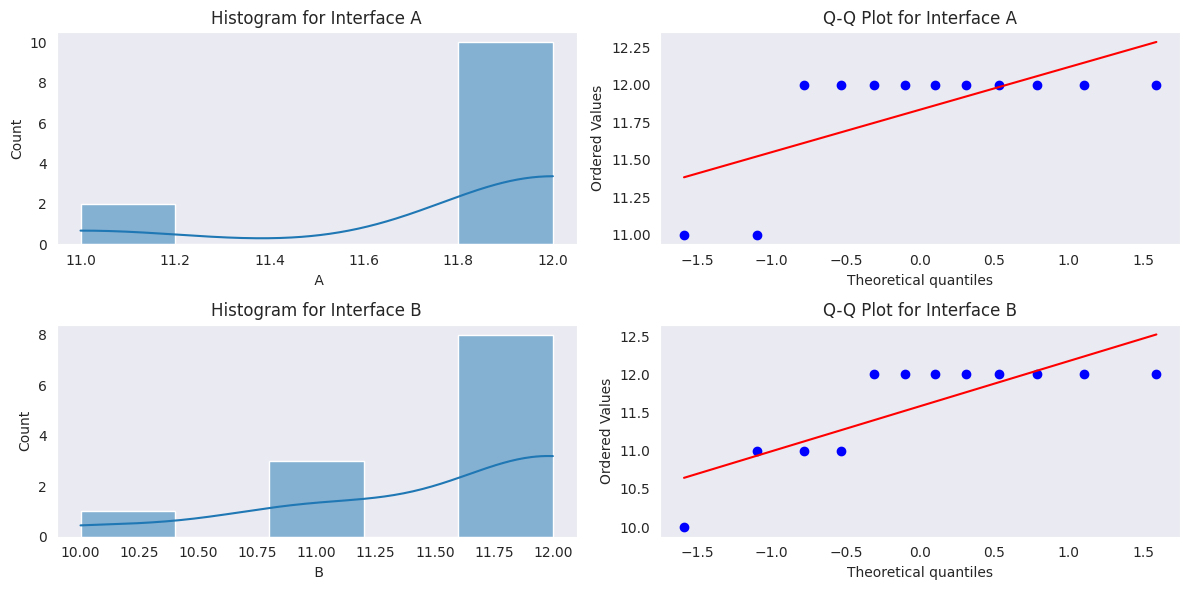

In [18]:
errors_pivot = correct_items.pivot(index='ParticipantID', columns='Interface', values='Measurement')

# Performing the Shapiro-Wilk test for normality on columns 'A' and 'B'
shapiro_test_A = stats.shapiro(errors_pivot[' A'])
shapiro_test_B = stats.shapiro(errors_pivot[' B'])

# Printing the results
print('Shapiro-Wilk Test for Column A:', shapiro_test_A)
print('Shapiro-Wilk Test for Column B:', shapiro_test_B)

# Histogram for Column A
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(errors_pivot[' A'], kde=True)
plt.title('Histogram for Interface A')

# Q-Q plot for Column A
plt.subplot(2, 2, 2)
stats.probplot(errors_pivot[' A'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Interface A')

# Histogram for Column B
plt.subplot(2, 2, 3)
sns.histplot(errors_pivot[' B'], kde=True)
plt.title('Histogram for Interface B')

# Q-Q plot for Column B
plt.subplot(2, 2, 4)
stats.probplot(errors_pivot[' B'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Interface B')

plt.tight_layout()
plt.show()

# Time
The time from the start of the test until the end


In [19]:
rtime['Interface'] = rtime['Interface'].str.replace("'", "")

In [20]:
rtime

,ParticipantID,Interface,Measurement
0,1,A,152
1,1,B,91
2,2,A,48
3,2,B,60
4,3,A,173
5,3,B,114
6,4,A,94
7,4,B,106
8,5,A,132
9,5,B,154


In [21]:
atime = rtime[rtime.Interface == 'A'].Measurement
btime = rtime[rtime.Interface == 'B'].Measurement

stat, p = stats.levene(atime, btime)
print('Levene’s Test Statistic:', stat)
print('P-value:', p)

# Independent t-test
stat, p = stats.ttest_rel(atime, btime)
print('Independent t-test results:')
print('Test Statistic:', stat)
print('P-value:', p)

Levene’s Test Statistic: 0.014840472241194282
P-value: 0.9043901267968157
Independent t-test results:
Test Statistic: -0.6348884136508312
P-value: 0.5413030710911653


Shapiro-Wilk Test for Column A: ShapiroResult(statistic=0.971125602722168, pvalue=0.9010806679725647)
Shapiro-Wilk Test for Column B: ShapiroResult(statistic=0.9839925169944763, pvalue=0.9829273223876953)


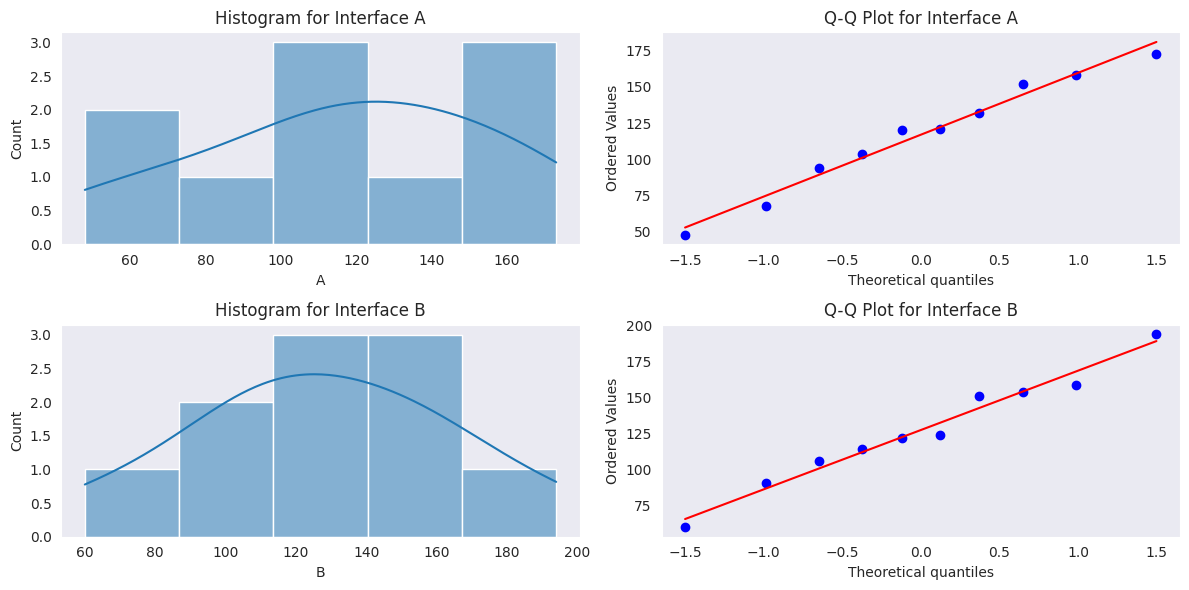

In [22]:
time_pivot = rtime.pivot(index='ParticipantID', columns='Interface', values='Measurement')

# Performing the Shapiro-Wilk test for normality on columns 'A' and 'B'
shapiro_test_A = stats.shapiro(time_pivot['A'])
shapiro_test_B = stats.shapiro(time_pivot['B'])

# Printing the results
print('Shapiro-Wilk Test for Column A:', shapiro_test_A)
print('Shapiro-Wilk Test for Column B:', shapiro_test_B)

# Histogram for Column A
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(time_pivot['A'], kde=True)
plt.title('Histogram for Interface A')

# Q-Q plot for Column A
plt.subplot(2, 2, 2)
stats.probplot(time_pivot['A'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Interface A')

# Histogram for Column B
plt.subplot(2, 2, 3)
sns.histplot(time_pivot['B'], kde=True)
plt.title('Histogram for Interface B')

# Q-Q plot for Column B
plt.subplot(2, 2, 4)
stats.probplot(time_pivot['B'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Interface B')

plt.tight_layout()
plt.show()

<Axes: xlabel='Measurement', ylabel='Count'>

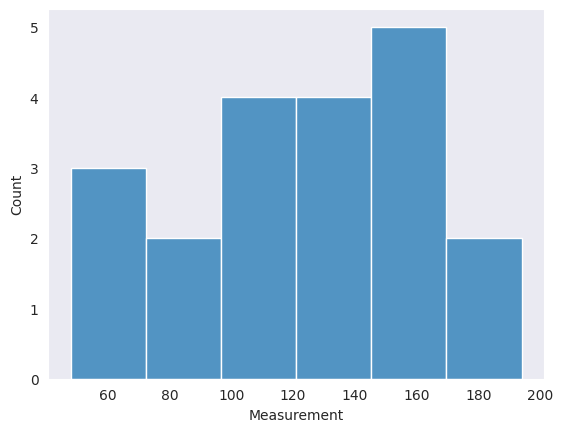

In [23]:
sns.histplot(rtime.Measurement)

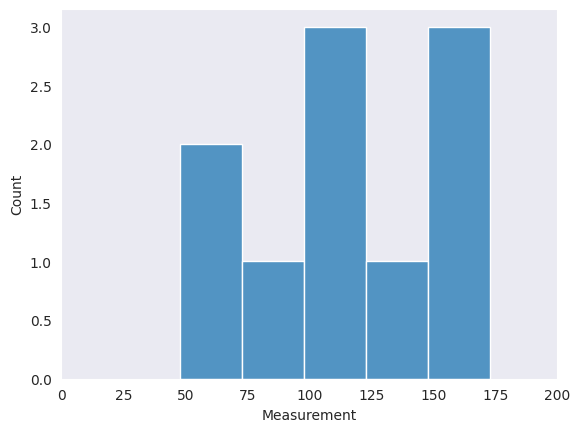

In [24]:
sns.histplot(rtime[rtime.Interface == 'A'].Measurement)

plt.xlim(0, 200)

plt.show()

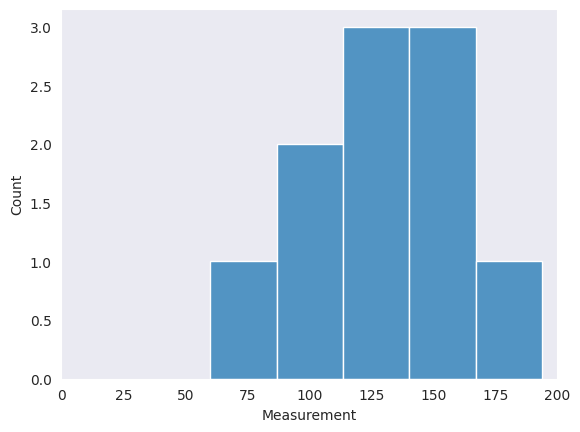

In [25]:
sns.histplot(rtime[rtime.Interface == 'B'].Measurement)

# Setting the x-axis range from 0 to 200
plt.xlim(0, 200)

# Show the plot
plt.show()